In [1]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
# US data into dataframe
df = pd.read_csv('./output/US_cleaned_data_2018')
df.head()

,Unnamed: 0,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,video_error_or_removed,description
0,0,2kyS6SvSYSE,17.11.14,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,People & Blogs,17.11.13,['SHANtell martin'],748374,57527,2966,15954,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1,1ZAPwfrtAFY,17.11.14,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,Entertainment,17.11.13,"['last week tonight trump presidency', '""last ...",2418783,97185,6146,12703,False,"One year after the presidential election, John..."
2,2,5qpjK5DgCt4,17.11.14,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,Comedy,17.11.12,"['racist superman', '""rudy""', '""mancuso""', '""k...",3191434,146033,5339,8181,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,3,puqaWrEC7tY,17.11.14,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,Entertainment,17.11.13,"['rhett and link', '""gmm""', '""good mythical mo...",343168,10172,666,2146,False,Today we find out if Link is a Nickelback amat...
4,4,d380meD0W0M,17.11.14,I Dare You: GOING BALD!?,nigahiga,Entertainment,17.11.12,"['ryan', '""higa""', '""higatv""', '""nigahiga""', '...",2095731,132235,1989,17518,False,I know it's been a while since we did this sho...


# Trending Popularity by Category

Text(0.5, 1.0, 'Video Count by Category')

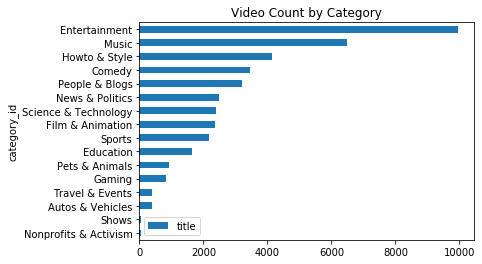

In [3]:
barp = df.groupby("category_id").count().sort_values("title").plot(kind='barh', y='title')
barp.set_title('Video Count by Category')

# Trending Popularity by Channel

2207 channels made it to trending during 2017-2018 with ESPN as the most popular

In [4]:
df.get("channel_title").value_counts()

ESPN                                      203
The Tonight Show Starring Jimmy Fallon    197
Vox                                       193
TheEllenShow                              193
Netflix                                   193
                                         ... 
Ozuna                                       1
Trevor Moran                                1
Hin Nya                                     1
DrakeBellVEVO                               1
Chad Kroeger                                1
Name: channel_title, Length: 2207, dtype: int64

# How Many Views Trending Videos Get

Views range from 549 to 225,211,923

In [5]:
df['views'].describe()

count    4.094900e+04
mean     2.360785e+06
std      7.394114e+06
min      5.490000e+02
25%      2.423290e+05
50%      6.818610e+05
75%      1.823157e+06
max      2.252119e+08
Name: views, dtype: float64

Very heavily skewed right

In [6]:
df['views'].skew()

12.240171007184745

Very heavily leptokurtic

In [7]:
df['views'].kurtosis()

232.38025399743842

Q1 and Q3 are roughly 242,329 and 1,823,157

## Views Boxplot

Text(0.5, 1.0, 'Boxplot of Views for All Trending Videos')

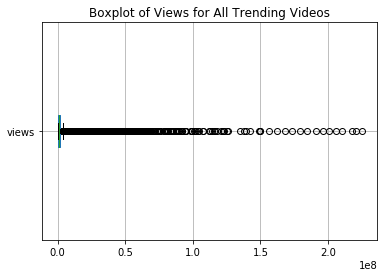

In [8]:
df.boxplot(['views'], vert = False).set_title('Boxplot of Views for All Trending Videos')

In [9]:
1823157 + (1.5 * (1823157 - 242329))

4194399.0

Outliers begin at 4,194,399

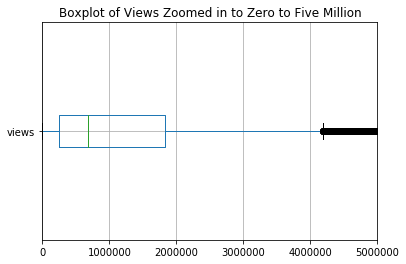

In [10]:
df.boxplot(['views'], vert = False).set_title('Boxplot of Views Zoomed in to Zero to Five Million')
plt.xlim(0, 5000000)
plt.show()

## Views Histogram

AttributeError: 'numpy.ndarray' object has no attribute 'set_title'

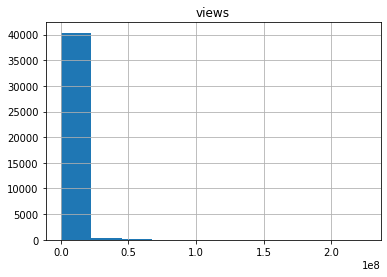

In [11]:
df.hist(column='views').set_title('Video Count by Views')

In [ ]:
mill = pd.DataFrame({})
mill['views'] = df['views']
indexNames = mill[mill['views'] >= 10000000].index
mill.drop(indexNames , inplace=True)

In [ ]:
mill.hist(column='views')

In [ ]:
hunthou = pd.DataFrame({})
hunthou['views'] = df['views']
indexNames = hunthou[hunthou['views'] >= 1000000 ].index
hunthou.drop(indexNames , inplace=True)

In [ ]:
hunthou.hist(column='views')

# Trending Like to Dislike Ratios

In [ ]:
(df.dislikes == 0).sum()

In [ ]:
df['dislikes'].describe()

In [ ]:
(df.likes == 0).sum()

In [ ]:
df['likes'].describe()

In [ ]:
ratios = pd.DataFrame({})
ratios['likes'] = df['likes']
ratios['dislikes'] = df['dislikes']
indexNames = ratios[ratios['dislikes'] == 0].index
ratios.drop(indexNames , inplace=True)
ratios['ratio'] = ratios['likes'] / ratios['dislikes']
ratios['ratio'].describe()

In [ ]:
df.boxplot(['likes'], vert = False)

In [ ]:
df.boxplot(['dislikes'], vert = False)

In [ ]:
ratios.boxplot(['ratio'], vert = False).set_title('Like to Dislike Ratios')

In [ ]:
ratios.boxplot(['ratio'], vert = False).set_title('Like to Dislike Ratios Zoomed in to Zero to Two Hundred')
plt.xlim(0, 200)
plt.show()

576 trending videos have fewer likes than dislikes

In [ ]:
(ratios.ratio < 1).sum()

# Trending Comment Count

633 trending videos with comments disabled (from data set with 'comments_disabled' column)

In [ ]:
(df.comment_count == 0).sum()

In [ ]:
df['comment_count'].describe()

In [ ]:
comments = pd.DataFrame({})
comments['comment_count'] = df['comment_count']
comments['comments_disabled'] = df['comments_disabled']
indexNames = comments[comments['comments_disabled']].index
comments.drop(indexNames , inplace=True)
comments['comment_count'].describe()

# Days from Publish to Trending